In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
import seaborn as sns
import matplotlib as ml
import pingouin as pg
warnings.filterwarnings('ignore')

In [69]:
SHEET_ID = '1inakMaj82P-tfDpPAHaTTLeYHTbr1fNNldtMKZGM8w4'
SHEET_NAME = 'Sheet1'
url = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}'
df = pd.read_csv(url)
print(df.head(2))

            Timestamp  \
0  4/27/2023 15:54:02   
1  4/28/2023 11:07:37   

  Questions about "MusicA" [The song maintained a sense of coherence and harmony.]  \
0                                              Agree                                 
1                                            Neutral                                 

  Questions about "MusicA" [The song sounded random]  \
0                                            Neutral   
1                                              Agree   

  Questions about "MusicA" [I enjoyed listening to the song]  \
0                                            Neutral           
1                                            Neutral           

  Questions about comparing "OriginalA" and "MusicA" [MusicA sounded like originalA]  \
0                                              Agree                                   
1                                              Agree                                   

  Questions about comparing "OriginalA

In [70]:
df.columns

Index(['Timestamp',
       'Questions about "MusicA" [The song maintained a sense of coherence and harmony.]',
       'Questions about "MusicA" [The song sounded random]',
       'Questions about "MusicA" [I enjoyed listening to the song]',
       'Questions about comparing "OriginalA" and "MusicA" [MusicA sounded like originalA]',
       'Questions about comparing "OriginalA" and "MusicA" [I want to listen to variations of this type again]',
       'Questions about "MusicB" [The song maintained a sense of coherence and harmony.]',
       'Questions about "MusicB" [The song sounded random]',
       'Questions about "MusicB" [I enjoyed listening to the song]',
       'Questions about comparing "OriginalB" and "MusicB" [MusicB sounded like originalB]',
       'Questions about comparing "OriginalB" and "MusicB" [I want to listen to variations of this type again]'],
      dtype='object')

In [71]:
df.shape

(37, 11)

In [72]:
df.drop(columns=["Timestamp"], inplace=True)

In [73]:
for col in df.columns:
    df[col] = df[col].astype('category')

In [74]:
df.head(2)

,"Questions about ""MusicA"" [The song maintained a sense of coherence and harmony.]","Questions about ""MusicA"" [The song sounded random]","Questions about ""MusicA"" [I enjoyed listening to the song]","Questions about comparing ""OriginalA"" and ""MusicA"" [MusicA sounded like originalA]","Questions about comparing ""OriginalA"" and ""MusicA"" [I want to listen to variations of this type again]","Questions about ""MusicB"" [The song maintained a sense of coherence and harmony.]","Questions about ""MusicB"" [The song sounded random]","Questions about ""MusicB"" [I enjoyed listening to the song]","Questions about comparing ""OriginalB"" and ""MusicB"" [MusicB sounded like originalB]","Questions about comparing ""OriginalB"" and ""MusicB"" [I want to listen to variations of this type again]"
0,Agree,Neutral,Neutral,Agree,Agree,Neutral,Agree,Neutral,Disagree,Disagree
1,Neutral,Agree,Neutral,Agree,Disagree,Disagree,Agree,Disagree,Agree,Disagree


In [75]:
likert_dict_positive = {
    "Strongly Agree": 5,
    "Agree": 4,
    "Neutral": 3,
    "Disagree": 2,
    "Strongly Disagree": 1
}

likert_dict_negative = {
    "Strongly Agree": 5,
    "Agree": 4,
    "Neutral": 3,
    "Disagree": 2,
    "Strongly Disagree": 1
}

# MusicA

In [76]:
dfa = df.iloc[:,0:5]
dfb = df.iloc[:,5:]
dfc = df.iloc[:,0:]


In [77]:
dfanum = dfa.replace(likert_dict_positive)
dfbnum = dfb.replace(likert_dict_positive)
dfnum = dfc.replace(likert_dict_positive)

In [78]:
for col in dfanum.columns:
    dfanum[col] = dfanum[col].astype('int')

for col in dfbnum.columns:
    dfbnum[col] = dfbnum[col].astype('int')

for col in dfnum.columns:
    dfnum[col] = dfnum[col].astype('int')

In [79]:
newcolsa = []
for col in dfa.columns:
    newcol = re.findall(r'\[(.*?)\]', col)
    newcolsa.append(newcol[0])
print(newcolsa)
dfa.columns = newcolsa
dfanum.columns = newcolsa

newcolsb = []
for col in dfb.columns:
    newcol = re.findall(r'\[(.*?)\]', col)
    newcolsb.append(newcol[0])
print(newcolsb)
dfb.columns = newcolsb
dfbnum.columns = newcolsb


newcols = []
for col in df.columns:
    newcol = re.findall(r'\[(.*?)\]', col)
    newcols.append(newcol[0])
print(newcols)
df.columns = newcols
dfnum.columns = newcols

['The song maintained a sense of coherence and harmony.', 'The song sounded random', 'I enjoyed listening to the song', 'MusicA sounded like originalA', 'I want to listen to variations of this type again']
['The song maintained a sense of coherence and harmony.', 'The song sounded random', 'I enjoyed listening to the song', 'MusicB sounded like originalB', 'I want to listen to variations of this type again']
['The song maintained a sense of coherence and harmony.', 'The song sounded random', 'I enjoyed listening to the song', 'MusicA sounded like originalA', 'I want to listen to variations of this type again', 'The song maintained a sense of coherence and harmony.', 'The song sounded random', 'I enjoyed listening to the song', 'MusicB sounded like originalB', 'I want to listen to variations of this type again']


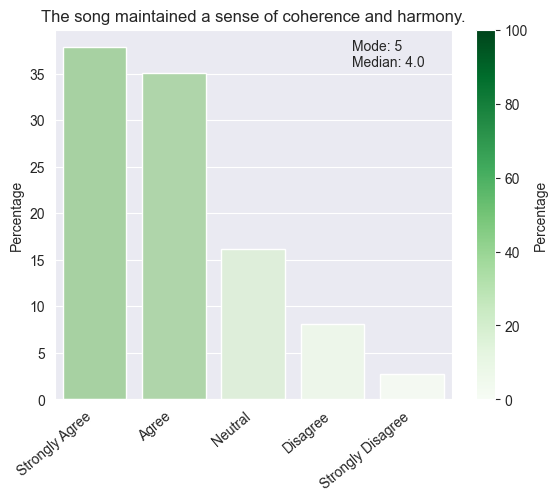

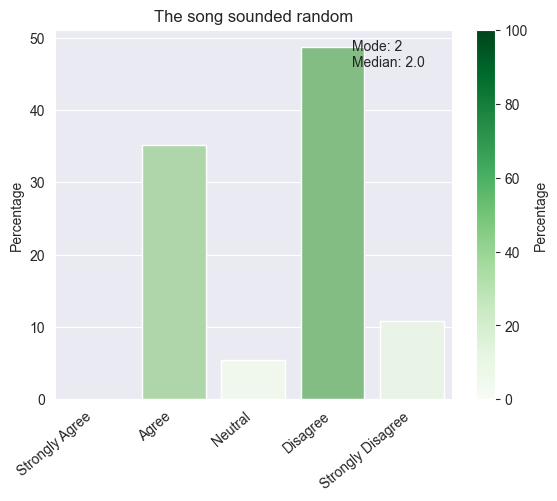

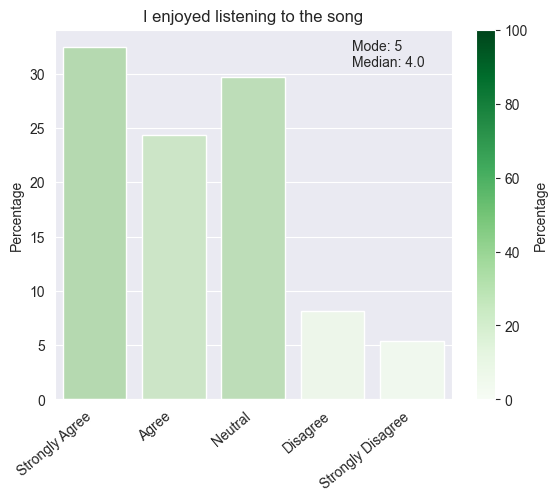

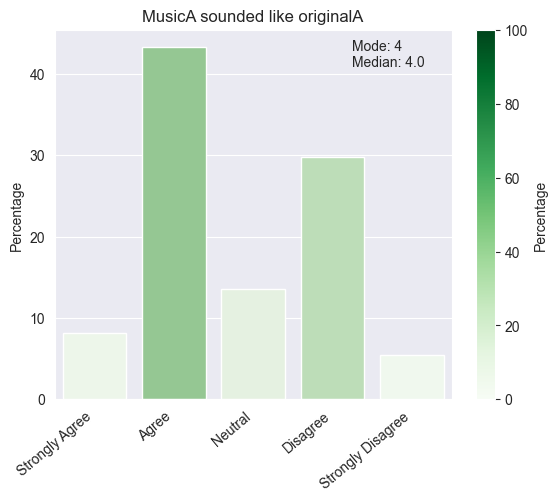

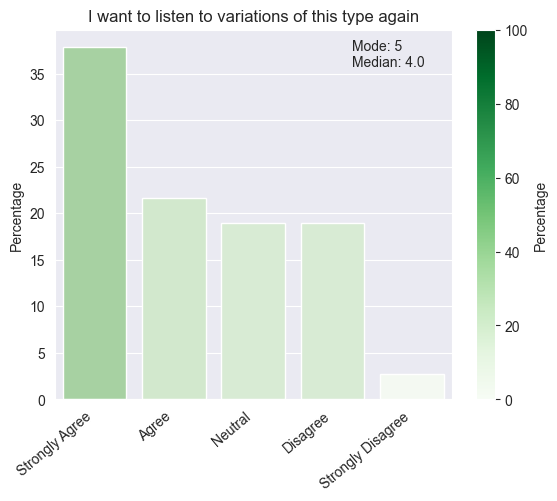

In [80]:
# specify the order of the categories
category_order = ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree']
#color_palette = sns.color_palette("Reds_r", n_colors=len(category_order))
cmap = ml.colormaps.get_cmap('Greens')
for col in dfa.columns:
    counts = dfa[col].value_counts()
    counts = counts.reindex(category_order)
    percentages = counts / counts.sum() * 100
    colors = percentages.apply(lambda x: cmap(x/100))
    ax = sns.barplot(x=percentages.index, y=percentages.values, palette=colors)
    #ax.set_xlabel('Category')
    ax.set_ylabel('Percentage')
    ax.set_title(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')

    # add colorbar legend for heatmap scale
    norm = plt.Normalize(vmin=0, vmax=100)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.ax.set_ylabel('Percentage')
    # get mode and median
    mode = dfanum[col].mode()[0]
    median = dfanum[col].median()

    # display mode and median on plot
    plt.text(0.75, 0.9, f"Mode: {mode}\nMedian: {median}", transform=ax.transAxes)
    plt.savefig(col+'_A.png',bbox_inches='tight')

    plt.show()

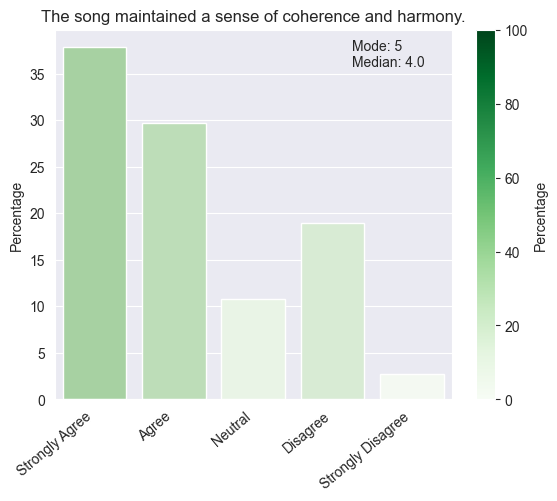

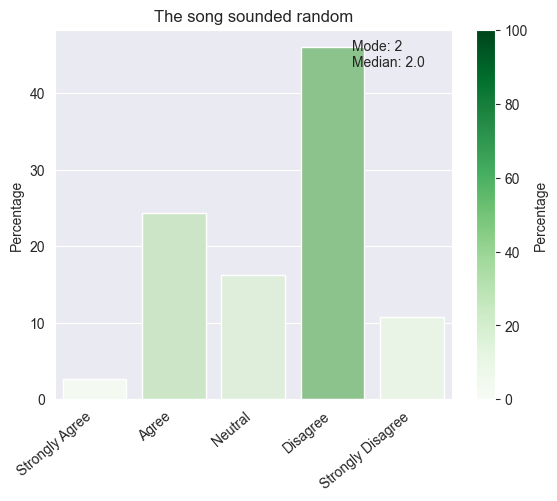

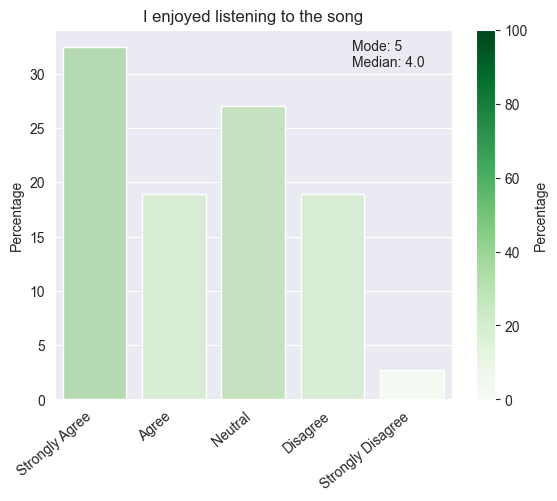

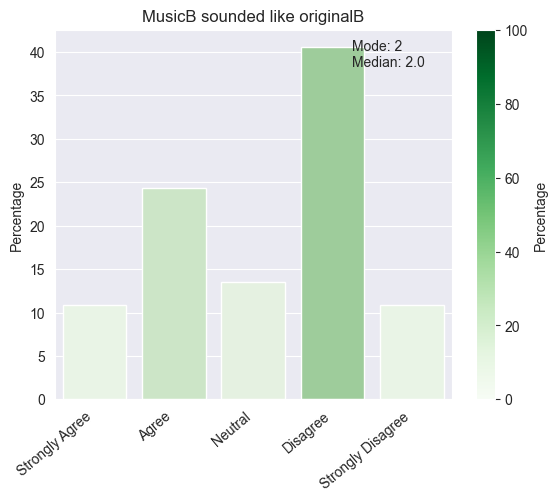

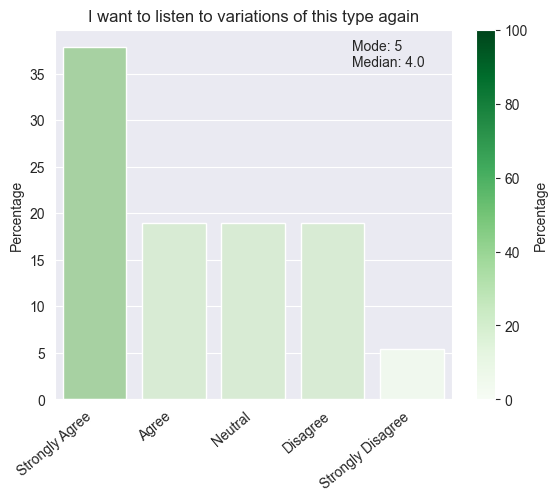

In [81]:
# specify the order of the categories
category_order = ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree']
#color_palette = sns.color_palette("Reds_r", n_colors=len(category_order))
cmap = ml.colormaps.get_cmap('Greens')
for col in dfb.columns:
    counts = dfb[col].value_counts()
    counts = counts.reindex(category_order)
    percentages = counts / counts.sum() * 100
    colors = percentages.apply(lambda x: cmap(x/100))
    ax = sns.barplot(x=percentages.index, y=percentages.values, palette=colors)
    #ax.set_xlabel('Category')
    ax.set_ylabel('Percentage')
    ax.set_title(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')

    # add colorbar legend for heatmap scale
    norm = plt.Normalize(vmin=0, vmax=100)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.ax.set_ylabel('Percentage')
    # get mode and median
    mode = dfbnum[col].mode()[0]
    median = dfbnum[col].median()

    # display mode and median on plot
    plt.text(0.75, 0.9, f"Mode: {mode}\nMedian: {median}", transform=ax.transAxes)
    plt.savefig(col+"-B.png",bbox_inches='tight')

    plt.show()

In [82]:
dfanum['The song sounded random - reverse'] = 6- dfanum['The song sounded random']
dfbnum['The song sounded random - reverse'] = 6- dfbnum['The song sounded random']

dfnum['The song sounded random - reverseA'] = 6- dfnum.iloc[:, 1]
dfnum['The song sounded random - reverseB'] = 6- dfnum.iloc[:, 6]

#First Metric Sum
dfanum['How coherent is the music variant?'] = dfanum['The song maintained a sense of coherence and harmony.'] + dfanum['The song sounded random - reverse']
dfbnum['How coherent is the music variant?'] = dfbnum['The song maintained a sense of coherence and harmony.'] + dfbnum['The song sounded random - reverse']

dfnum['How coherent is the music variant?'] = dfanum['How coherent is the music variant?'] + dfbnum['How coherent is the music variant?']

#Second Metric2
dfanum['How different is the variant from the original?'] = dfanum['MusicA sounded like originalA']
dfbnum['How different is the variant from the original?'] = dfbnum['MusicB sounded like originalB']

dfnum['How different is the variant from the original?'] = dfanum['How different is the variant from the original?'] + dfbnum['How different is the variant from the original?']

#Third Metric
dfanum['Are music variants enjoyable?'] = dfanum['I enjoyed listening to the song'] + dfanum['I want to listen to variations of this type again']
dfbnum['Are music variants enjoyable?'] = dfbnum['I enjoyed listening to the song'] + dfbnum['I want to listen to variations of this type again']

dfnum['Are music variants enjoyable?'] =  dfanum['Are music variants enjoyable?'] + dfbnum['Are music variants enjoyable?']

In [83]:
dfnum.columns

Index(['The song maintained a sense of coherence and harmony.',
       'The song sounded random', 'I enjoyed listening to the song',
       'MusicA sounded like originalA',
       'I want to listen to variations of this type again',
       'The song maintained a sense of coherence and harmony.',
       'The song sounded random', 'I enjoyed listening to the song',
       'MusicB sounded like originalB',
       'I want to listen to variations of this type again',
       'The song sounded random - reverseA',
       'The song sounded random - reverseB',
       'How coherent is the music variant?',
       'How different is the variant from the original?',
       'Are music variants enjoyable?'],
      dtype='object')

In [84]:
print(dfnum.columns)

Index(['The song maintained a sense of coherence and harmony.',
       'The song sounded random', 'I enjoyed listening to the song',
       'MusicA sounded like originalA',
       'I want to listen to variations of this type again',
       'The song maintained a sense of coherence and harmony.',
       'The song sounded random', 'I enjoyed listening to the song',
       'MusicB sounded like originalB',
       'I want to listen to variations of this type again',
       'The song sounded random - reverseA',
       'The song sounded random - reverseB',
       'How coherent is the music variant?',
       'How different is the variant from the original?',
       'Are music variants enjoyable?'],
      dtype='object')


In [85]:
dfnum.columns = ['The song maintained a sense of coherence and harmonyA.',
              'The song sounded randomA', 'I enjoyed listening to the songA',
              'MusicA sounded like originalA',
              'I want to listen to variations of this type againA',
              'The song maintained a sense of coherence and harmonyB.',
              'The song sounded randomB', 'I enjoyed listening to the songB',
              'MusicB sounded like originalB',
              'I want to listen to variations of this type againB',
              'The song sounded random - reverseA',
              'The song sounded random - reverseB',
              'How coherent is the music variant?',
              'How different is the variant from the original?',
              'Are music variants enjoyable?']

In [86]:
for i in range(len(dfnum.columns)):
    print(i, dfnum.columns[i])

0 The song maintained a sense of coherence and harmonyA.
1 The song sounded randomA
2 I enjoyed listening to the songA
3 MusicA sounded like originalA
4 I want to listen to variations of this type againA
5 The song maintained a sense of coherence and harmonyB.
6 The song sounded randomB
7 I enjoyed listening to the songB
8 MusicB sounded like originalB
9 I want to listen to variations of this type againB
10 The song sounded random - reverseA
11 The song sounded random - reverseB
12 How coherent is the music variant?
13 How different is the variant from the original?
14 Are music variants enjoyable?


(0.7998292480531085, array([0.689, 0.884]))

In [87]:
firstMetric = dfnum.iloc[:, [0,5,10,11]]
pg.cronbach_alpha(data=firstMetric)

(0.7985365853658536, array([0.667, 0.887]))

In [88]:
secondMetric = dfnum.iloc[:, [3,8]]
pg.cronbach_alpha(data=secondMetric)

(0.7488247145735392, array([0.512, 0.871]))

In [89]:
thirdMetric = dfnum.iloc[:, [2,4,7,9]]
pg.cronbach_alpha(data=thirdMetric)

(0.9363131755769791, array([0.895, 0.964]))

In [90]:
overall = dfnum.iloc[:, [0,5,10,11,2,4,7,9,3,8]]
pg.cronbach_alpha(data=overall)

(0.8559429113339583, array([0.775, 0.916]))

In [91]:
overallColumns =  ['How coherent is the music variant?',
'How different is the variant from the original?',
'Are music variants enjoyable?', 'overall Score']

In [93]:
dfnum['overall Score'] = dfnum.iloc[:, 12:].sum(axis=1)

In [94]:
for col in overallColumns:
    print(col)

    print("Mean",  dfnum[col].mean())
    print("Std", dfnum[col].std())
    print("Median", dfnum[col].median())
    print("Mode", dfnum[col].mode()[0])
    print("Min", dfnum[col].min())
    print("Max", dfnum[col].max())

    print("\n")


How coherent is the music variant?
Mean 14.513513513513514
Std 3.5088904674144947
Median 15.0
Mode 18
Min 8
Max 20


How different is the variant from the original?
Mean 6.027027027027027
Std 2.1145854136145625
Median 6.0
Mode 4
Min 2
Max 10


Are music variants enjoyable?
Mean 14.675675675675675
Std 4.534154668574789
Median 15.0
Mode 20
Min 4
Max 20


overall Score
Mean 35.21621621621622
Std 7.7679367170981015
Median 36.0
Mode 42
Min 18
Max 49




In [95]:
 dfnum.iloc[:, 12:].columns

Index(['How coherent is the music variant?',
       'How different is the variant from the original?',
       'Are music variants enjoyable?', 'overall Score'],
      dtype='object')

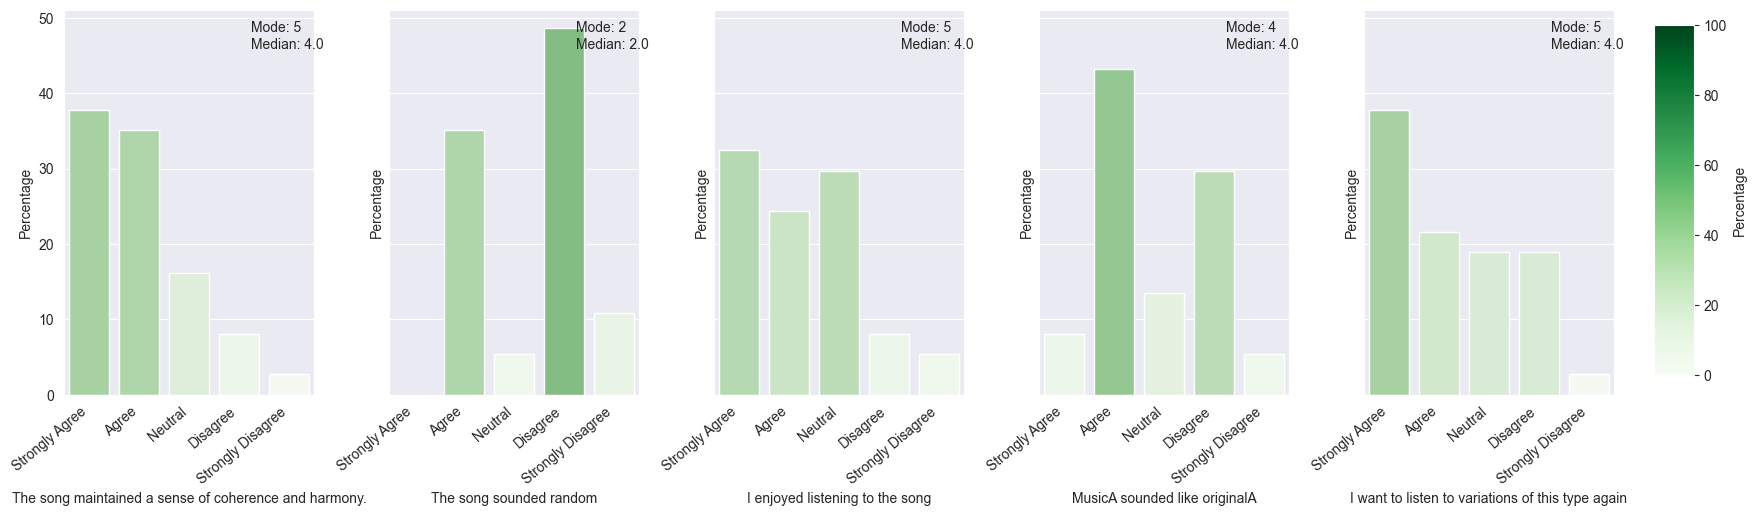

In [96]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
import mlxtend.plotting as ml

# specify the order of the categories
category_order = ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree']
cmap = cm.get_cmap('Greens')

# create subplots for each column
fig, axs = plt.subplots(nrows=1, ncols=len(dfa.columns), figsize=(20, 5), sharey=True)

# loop through each column and create a bar graph on its respective subplot
for i, col in enumerate(dfa.columns):
    counts = dfa[col].value_counts()
    counts = counts.reindex(category_order)
    percentages = counts / counts.sum() * 100
    colors = percentages.apply(lambda x: cmap(x/100))
    ax = sns.barplot(x=percentages.index, y=percentages.values, palette=colors, ax=axs[i])
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    # get mode and median
    mode = dfanum[col].mode()[0]
    median = dfanum[col].median()
    # display mode and median on plot
    plt.text(0.75, 0.9, f"Mode: {mode}\nMedian: {median}", transform=ax.transAxes)

# create a separate subplot for the colorbar legend
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
norm = plt.Normalize(vmin=0, vmax=100)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.ax.set_ylabel('Percentage')

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)
plt.savefig("SongA_analysis.png",bbox_inches='tight')
# display plot
plt.show()


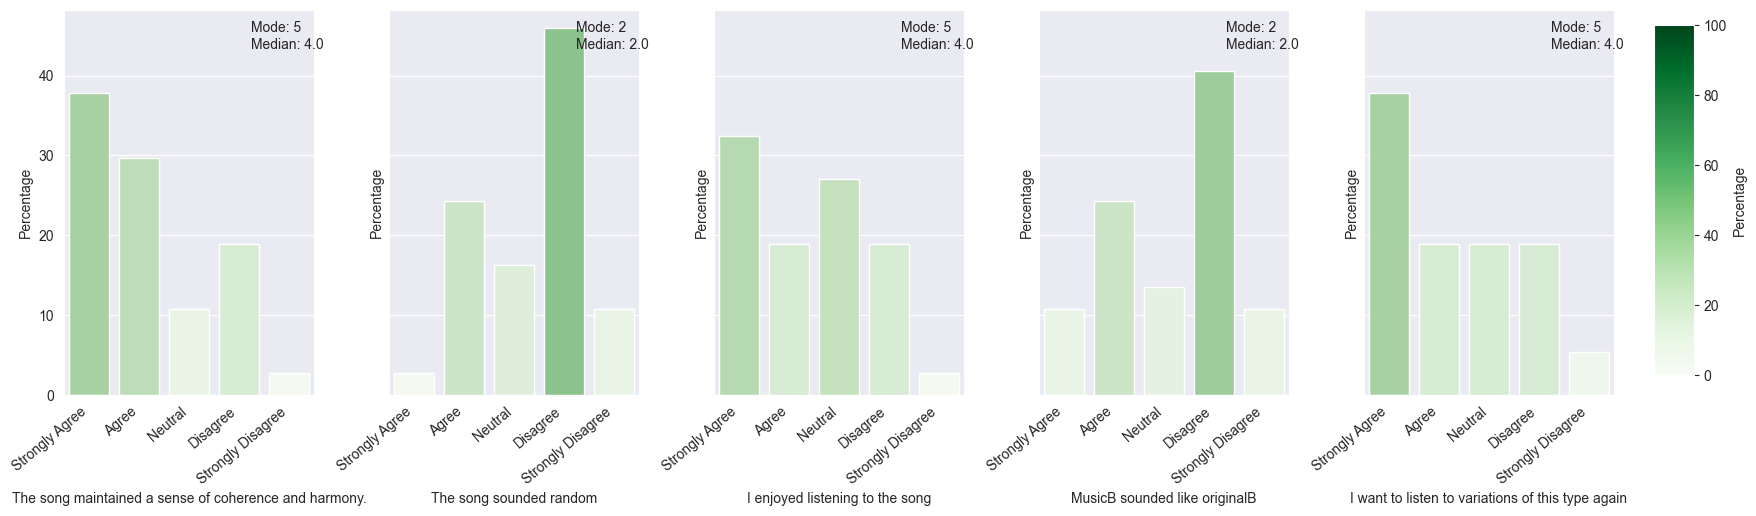

In [97]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
import mlxtend.plotting as ml

# specify the order of the categories
category_order = ['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree']
cmap = cm.get_cmap('Greens')

# create subplots for each column
fig, axs = plt.subplots(nrows=1, ncols=len(dfa.columns), figsize=(20, 5), sharey=True)

# loop through each column and create a bar graph on its respective subplot
for i, col in enumerate(dfb.columns):
    counts = dfb[col].value_counts()
    counts = counts.reindex(category_order)
    percentages = counts / counts.sum() * 100
    colors = percentages.apply(lambda x: cmap(x/100))
    ax = sns.barplot(x=percentages.index, y=percentages.values, palette=colors, ax=axs[i])
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    # get mode and median
    mode = dfbnum[col].mode()[0]
    median = dfbnum[col].median()
    # display mode and median on plot
    plt.text(0.75, 0.9, f"Mode: {mode}\nMedian: {median}", transform=ax.transAxes)

# create a separate subplot for the colorbar legend
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
norm = plt.Normalize(vmin=0, vmax=100)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.ax.set_ylabel('Percentage')
# adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)
plt.savefig("SongB_analysis.png",bbox_inches='tight')
# display plot
plt.show()
